# Training Introduction 
We previously went over the architecture of a neural network, mainly talking about how to pass data from input to output, and end up with a probabilistic prediction. However, the problem was that all of our weights were random and thus, our predictions were not accurate!

<img src="images/main-nn-equation.png">

In this section we are going to focus on how to change our weights so that they are accurate. Recall, our training data will consist of input and target pairs, with the goal being to make the predictions, $y$, as close to the targets $t$ as possible. To do this we will create a **cost function** such that:
* The **cost is large** when the prediction is not close to the target
* The **cost is small** when the prediction is close to the target
In the end we are trying to make our cost as small as possible! Remember that in the past the method that we used to achieve this is called gradient descent. This is a bit harder with neural networks, because the equations are a bit more complex, but no new skills are required.

## Gradient Descent in NNs: Backpropagation
Gradient descent in neural networks has a special name: **backpropagation**. Backpropagation is recursive in nature and allows us to find the gradient in a systematic way. This recursiveness allows us to do backpropagation for neural networks that are arbitrarily deep, without much added complexity. For instance, a 1-hidden layer ANN is no harder than a 100 layer ANN.

---
# What do all of these symbols and letter mean?
## Training Data
* Training inputs: X
* Training targets: Y
* Generally speaking, these are both matrices
* X is of shape N x D
    * N = number of samples
    * D = number of input features
* Y is of shape N x 1 
    * aka a column vector
    * a 2-d object 
* Alternatively, Y can just be a vector of only 1-D of length N
    * this is how we will represent it in Numpy
    
## Training Data and Predictions
* Inputs: X, Targets: Y, Predictions: p(Y|X)
* p(Y|X) represents a full probability distribution over all individual values in the matrix Y, given the matrix X
* p(Y|X) is therefore also a matrix, same size as Y
* p(y = k | x) is a probability value - a single number 
    * Representing the probability that y is of class k, given the input vector x 
* Note: 
    * Capital letters usually represent matrices
    * lowercase letters usually represent vectors

## p(Y | X) is inconvenient
* p(Y | X) is inconvenient to write 
* many characters
* variable names cannot contain spaces or parentheses
* so we resort to things like:
    * p_y_given_x
    * py_x
    * Py
* none are really ideal
* Old school alternative for predictions is to write:
## $$\hat{y}$$
* notice that this still cannot represent a variable in code...

## Another convention
* This is were things start to get confusing
* an alternative way to represent inputs, targets, and predictions is:
    * Inputs: X
    * Targets: T
    * Predictions: Y
* this is beneficial since we no longer need to write out P of Y given X anywhere
* however this Y now conflicts with our other Y- before Y meant the targets, now it means the predictions

## Using Context
* we will need to use context to determine what Y really is 
* if we see Y and T at the same time, it should be clear that Y is a prediction
* if you see Y being assigned the output a neural network, its a prediction
* but if you see Y and Yhat, Y and p_y_given_x at the same time, Y is a target 

## Weights

<img src="images/weights-diagram.png">

* we have some conventions for the sizes of things
* N is the number of samples we have collected in our experiment
* D is then number of features, which is the size of the input layer in the neural network
* M represents the size of the hidden layer
* K represents the size of the output layer 
* K is the number of output classes, and can be anything from 2 and larger 
* when we have a 1 hidden layer neural network, one way to name the weights is as follows:
    * W is the weight matrix from the input to hidden layer - (D x M)
    * b is the bias term at hidden layer - (M x 1)
    * V is the weight matrix from the hidden to output layer - (M x K)
    * c is the bias term at the output layer - (K x 1)
* you can imagine that if we start adding more hidden layers, we are going to run out of letters! So using V and c isn't really a great option.
* How about just numbering our W's and b's?
    * W1, b1, W2, b2, ... and so on

## Indices
* we may or may not put indices in different places if they represent different things
* Example: if we are looking for the target T for the nth sample and kth class
* In Numpy: T[n,k]
* T(n,k)
* $T^n_k$
* $T_{nk}$
* $t^n_k$
* $t_{nk}$

## Indexing
* i, j, and k are common letters we use for indices
* Ex. i=1...D (input layer)
* Ex. j=1...M (hidden layer)
* Ex. k=1...K (output layer)
* the problem with i, j, and k is what happens if we have more than 1 hidden layer, and eventually run out of letters
* we then pick and index outside of these 3 current letters:
    * q = 1...Q
    * r = 1...R
    * s = 1...S

## Learning Rate
* greek letters: alpha or eta

<img src="images/learning-rate.png">

## Cost/Objective/Error Function
* Typical letters: E or J
* Cost or error: usually means something we want to minimize
* Objective: can be something to minimize or maximize 
* Probabilistic interpretation of cost: negative log-likelihood
* we are trying to maximize the log likelihood, or minimizing the negative log likelihood
* minimizing E is the same as maximizing -E
* So if you are minimizing the negative log-likelihood (gradient **descent**) is the same as maximizing the log-likelihood (and likelihood) (gradient **ascent**)

## Likelihood
* Typically we use the uppercase L for likelihood, lowercase l for log-likelihood, if they are both presented together
* If discussing log-likelihood or negative log-likelihood by itself, we might just use L since L is easy to see, and l can be confused for I

---
# What does it mean to train a Neural Network? 
* this is going to be very similar to logistic regression

## The Main Concepts
* we very intuitively define something called the "cost"
* we want to minimize the cost!  
* But how do we minimize the cost? This falls into the domain of calculus! Calculus provides the tools to find the min/max of a function!
* we specifically use a method called **gradient descent**

## How do we define cost? 
* recall that for binary classification, this is exactly how we would calculate the likelihood of a sequence of coin tosses
* So for example, say we flip 2 heads and 3 tails
* Because these are independent trials, the total likelihood is then:

#### $$Likelihood = p(H)p(H)p(T)p(T)p(T)$$

* again, the reason we can multiply these probabilities is because each coin toss is independent of the others
* another way to write this is to call:

#### $$p = p(H)$$
* and hence we can rewrite likelihood as:

#### $$Likelihood = p^{number \; of\; heads}(1-p)^{number \;of \; tails}$$

## Minimize or Maximize?
* the likelihood, or in other words the probability of our model, aka the probability of our data, given our model/parameters, is something we want to maximize
* but recall that we are looking for a cost, in other words, something to minimize
* In order to get something that we can call the cost, we take the negative log of the likelihood and call it the "cost"
* Negative log likelihood = -{#H logp + #T log(1-p)}
* recall from logistic regression that this is called the cross entropy cost function

## Cross-Entropy
* we can phrase it in terms of the output probability of the logistic regression model, and the targets
* $y_n$ = output of logistic regression or neural network
* $t_n$ = actual target (0 or 1) in the binary case 

<img src="images/cross-entropy-cost.png">

* notice that if we had a neural network doing binary classification, we would use this exact same cost function
* recall that in order to find the best weights to minimize this cost, we can use gradient descent 
* we can also maximize the negative of this, gradient ascent

## Cross Entropy for Multi-class Classification
* in this section we want to be able to handle any number of outputs 
* lets consider a die roll (6 faces, but lets call it K)
* the probability of rolling k = $y_k$
* $t_k$ = 1 if we roll k, 0 if we do not roll k
* we have N total die rolls, so $t_{n,k} =1$ if we rolled k on the nth die roll 
* therefore, only one of the $t_{n,k}$ can equal 1 for any particular n
    * $t_{n,k}$ is thus an indicator matrix or one hot encoded matrix of 1s and 0s
    
<img src="images/multi-class-likelihood.png">

* notice that y and k now have two indexes each:
    * n corresponds to which sample we are looking at 
    * and k corresponds to which class we are looking at 
* notice that for any particular n, only 1 of the k targets can be 1, and the rest must be 0
* that is because if we roll a die and get a 6, then that same die roll can't be any other number 

## Cross Entropy for Multi-class Classification

<img src="images/cross-entropy-for-multiclass-classification.png">

* What is cross entropy: https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/
* we again want to transform this into a cost, so we will take the negative log of the likelihood
* this is called the cross entropy cost function, but for multiclass classification
* next we will see how to perform gradient descent on the new cost function and how to write it in code! 

---
# Backpropagation Intro 
* Lets start by recalling how we trained the logistic regression model

## Logistic Regression Recap
* we start with an objective function, and for binary classification we use cross entropy 

<img src="images/cross-entropy-cost.png">

* we know that this objective function has a global minimum, so it looks something like a parabola 
* now we usually will randomize our weights initially, and then we slowly move towards the minimum in small steps
* we find the direction for the minimum using the gradient, $\frac{dJ}{dw}$

<img src="images/cost-minimization.png">

* we end up with an update rule:

#### $$w += w - \alpha\frac{dJ}{dw}$$

* where $\alpha$ is the learning rate 
* this process is called gradient descent
* You can also do gradient ascent, where the goal is to find a global maximum

#### $$w += w + \alpha\frac{dJ}{dw}$$

## Neural Networks Gradient Descent
* we are going to do the exact same process with neural networks! However, because they are nonlinear we are going to find a local minima, not global minimum
* additionally, because the weight updates are dependent on the error at multiple outputs, we are going to need the concepts of total derivatives

### Total Derivatives
* so if you have a function of x and y, $f(x,y)$, where x is a function of t, $x(t)$, and y is a function of t, $y(t)$, hence it is a parameterized function
* The goal is to take the **total derivative**

#### $$\frac{df}{dt}$$

* To do this we use the **chain rule**

#### $$\frac{df}{dt}= \frac{df}{dx}\frac{dx}{dt} +\frac{df}{dy}\frac{dy}{dt}$$

* now if you had a vector x, which has k components, and they are all parameterized by t, you can imagine that you would do the same thing, using a summation

#### $$\frac{df}{dt} = \sum_k\frac{df}{dx_k}\frac{dx_k}{dt}$$

## Objective function with Softmax
* basically this is the same as the likelihood of rolling a die
* so if you were to roll a die, you would get your likelihood to be, with n independent and identically distributed tosses:

#### $$Likelihood = \prod_{n=1}^N\prod_{k=1}^6 (\theta_k^n)^{t_k^n}$$

* so with neural networks this is exactly the same!

#### $$P(targets\;|\;inputs, weights) = P(targets\;|\;X,W,V) = \prod_{n=1}^N\prod_{k=1}^K (\theta_k^n)^{t_k^n}$$

* so we are going to work with the log likelihood, not the negative log liklelihood, and do gradient ascent instead of descent
* so lets take the log likelihood

#### $$\sum_n\sum_kt_k^nlogy_k^n$$

* now that we have our objective function, what do we do with it?
* it is the same idea as with logistic regression! We want to find the derivative with respect to certain weights. 
* since we have 2 sets of weights for a 1 hidden layer NN (W and V), the dimensions of each node are D, M, and K, and they are indexed by d, m, k

<img src="images/1-hidden-layer-diagram.png">

* so we want to find these derivatives: 

#### $$\frac{dJ}{dV_{mk}}$$
#### $$\frac{dJ}{dW_{dm}}$$

* Note that in these derivatives, J can be thought of as our **error**
* we are trying to find how the error (cost, J) changes as we change our weights!
* because we are doing backpropagation, we are going to find $\frac{dJ}{dV_{mk}}$ first, because it is on the right, followed by backpropagating the error, and then we will find $\frac{dJ}{dW_{dm}}$
* this can be done using the chain rule 

#### $$\frac{dJ}{dV_{mk}}= \sum_n\sum_{k'}t_{k'}^n\frac{1}{y_{k'}^n}\frac{dy_{k'}^n}{dV_{mk}}$$

* now the question is, how do we find: $\frac{dy_{k'}^n}{dV_{mk}}$?
* in other words...

### How do we find the derivative of softmax?
#### $$y_k=\frac{e^{a_k}}{\sum_je^{a_j}}$$
* where the activation, $a_k$ is just the dot product of the input times the weights

#### $$a_k= V_k^TZ$$

* so we want to find just the derivative of the softmax first
    * if k == k'

#### $$\frac{dy_{k'}}{da_k} = y_{k'}(1-y_k)$$  

    * if k != k'
#### $$\frac{dy_{k'}}{da_k} = -y_{k'}y_k$$  

* these can be combined using the kronecker delta
    * if i == j
    
#### $$\delta_{ij} = 1$$    

    * if i != j

#### $$\delta_{ij} = 0$$        

* so the derivative is...

#### $$\frac{dy_{k'}}{da_k} = y_{k'}(\delta_{kk'}-y_k)$$  

* we also know from the dot product that the derivative of the activation is just zm

#### $$\frac{da_k}{dV_{mk}}=z_m$$

## Combine

#### $$\frac{dJ}{dV_{mk}}= \sum_n(t_k^n-y_k^n)z_m$$

---
<br></br>
# 1. Backpropagation Walkthrough
At this point I highly recommend that you go through my backpropagation walkthrough in the appendix! It goes through the backpropagation process in great detail, with several measures taken to simplify the process and help learn the basics. If you have just come from that walk through, here are the main changes that we are about to encounter:
* Instead of binary classification, we are now going to be doing multiclass classification, and making use of the softmax, instead of the sigmoid, at the output layer. Recall, softmax is defined as:

#### $$y_k=\frac{e^{a_k}}{\sum_je^{a_j}}$$

Where k represents the class $k$ in the output layer. In other words our $y$ output is going to be a  **(kx1)** vector for a single training example, and an **(Nxk)** matrix when computed for the entire training set. 
* We are now going to be using the **cross entropy error** as our **objective function**, instead of the least squares error. Recall, **cross entropy error** for **binary classification** is:

#### $$Cost = J = -\sum_{n=1}^Nt_nlog(y_n)+(1-t_n)log(1-y_n)$$

And for **multi-class classification**:

#### $$Cost = J = -\sum_{n=1}^N\sum_{k=1}^Kt_{n,k}logy_{n,k}$$

<br></br>
## 1.1 Problem Setup
Lets take a minute to clearly define the problem that we are going to be working with. We are going to be investigating a **neural network** with **1 hidden layer**, that will be using the **softmax** at the output. As an **error/cost function** we will be using **cross entropy**. The overall architecture of our neural network will look like:

<img src="images/nn-diagram.png">

<br></br>
### 1.1.1 Notation 
It is very important to have a clear understanding of the notation and matrice sizes that will be going along with this walk through. Let's define them now:
> * **N**: is the number of samples we have collected in our experiment
* **D**: the number of input features, which is the size of the input layer in the neural network. It is indexed by **d**.
* **M**: represents the size of the **hidden layer**. It is indexed by **m**.
* **K**: represents the size of the **output layer**. It is indexed by **k**.
* **K**: number of **output classes**, and can be anything from 2 and larger
* **t**: this is our target for a given training example
* **y**: this is the output probability from our network, aka our prediction
* **a**: the activation, the value that goes into a node (a linear combination). This can be used at any layer, but we will use it specifically for the output layer, right before the softmax. 
* Since we will be performing matrix operations and want to vectorize our implementation, we will look at all training examples at the same time. Hence, our layers have the following dimensions:
    * **X**, the **input layer**, is an **(N x D)** matrix
    <img src="images/x-input-matrix.png">
    * **Z**, the **hidden layer**, is an **(N x M)** matrix
    <img src="images/hidden-layer-matrix.png">
    * **K**, the **output layer**, is an **(N x K)** matrix
    <img src="images/output-layer-matrix.png">
* In our example (1 hidden layer neural network), we will name the **weights** as follows:
    * **W** is the weight matrix from the **input** to **hidden layer**, it is **(D x M)**
    <img src="images/input-to-hidden-layer-matrix.png">
    * **b** is the bias term at hidden layer, it is **(M x 1)**
    * **V** is the weight matrix from the **hidden** to **output layer**, it is **(M x K)**
    <img src="images/hidden-to-output-matrix.png">
    * **c** is the bias term at the output layer, it is **(K x 1)**

<br></br>
## 1.2 Starting Point and Overall Goal
Okay great, we now have the problem fully described and drawn out, understanding how each component looks. Lets take a minute to go over where we are starting when we begin backpropagation, and then clearly define the goals that we are trying to achieve. 

Backpropagation is going to occur *after* a prediction, which is made using the **feed forward** method. So we are picking up with a set of predictions, and we are going to determine the amount of error in those predictions using the **cross entropy loss**. Our goal is to figure out how to change the weights so as to minimize the cross entropy loss. So, to sum up, when we begin, we already know:

The values of the nodes in the **hidden layer z**:
#### $$z = \sigma(W^Tx)$$
The values of the nodes in the **output layer**:
#### $$y = softmax(V^Tz)$$
Keep in mind that in the above equation, $y$ is a $k$ dimensional vector. Each value that $k$ holds represents the probability that that training example belongs to class $k$. 
Finally, we know the value of the **cross entropy loss**:
#### $$J = \sum_{k=1}^Kt_klogy_k$$
Remember, the easiest way to think about the cross entropy loss in the above equation is as follows. Lets say we have 5 classes we are working with, and we are utilizing one training example, that belongs to class 3. We could label our target vector as:
#### $$t = [class_1 \; class_2\;class_3\;class_4\;class_5]$$
#### $$t = [0\;0\;1\;0\;0]$$
And then lets say that our prediction, $y$, ended up being:
#### $$y = [0.05\;0.15\;0.7\;0.04\;0.06]$$
We would then iterate through the vectors $t$ and $y$ in order to determine the total cross entropy cost. 
#### $$J = 0*log(0.05)+0*log(0.15)+1*log(0.7)+0*log(0.04)+0*log(0.06)$$
#### $$J = 1*log(0.7)$$

Now in this example, because we are going to be utilizing a matrix operation and working with all training examples at once, our **cross entropy cost function** will be modified to look like:
### $$\sum_n\sum_kt_k^nlogy_k^n$$
Which only means that now we are still looping through all the $k$ outputs of softmax, but also looping through *all* **N** training examples. 

With that taken care of, lets mathematically define what we are trying to solve for during this backpropagation process. We are trying to find how the **cross entropy cost** changes as we change $W_{dm}$, and as we change $V_{mk}$. Utilzing derivatives that looks like:

#### $$\frac{\partial J}{\partial W_{dm}}$$
#### $$\frac{\partial J}{\partial V_{mk}}$$

We know that when we backpropagate, we must solve for the weights in the hidden to output layer first, so we can start there. 

<br></br>
## 1.3 Find weights $V_{mk}$
So in order to determine how a change in $V_{mk}$ changes the cross entropy cost, $J$, we are going to need to use the **chain rule**. 
#### $$\frac{\partial J}{\partial V_{mk}}$$
Meaning we need to find:

1: How the **cross entropy** changes as we change the **output** from the softmax, $y$:

#### $$\frac{\partial J}{\partial y}$$

2: How the **output** from the softmax $y$ changes as we change the **input** to the softmax, $a$:

#### $$\frac{\partial y}{\partial a}$$

3: How the **input** to the softmax $a$ changes as we change the **weights**:

#### $$\frac{\partial a}{\partial V_{mk}}$$

Combining these via the chain rule we have the equation:

#### $$\frac{\partial J}{\partial V_{mk}}=\frac{\partial J}{\partial y}\frac{\partial y}{\partial a}\frac{\partial a}{\partial V_{mk}}$$

<br></br>
### New Notation
We are going to be introducing some additional notation to the chain rule now. This is particularly new if you are just coming from the backpropagation walkthrough in the appendix. The addition is due to the fact that we are utilizing matrix operations now, in addition to softmax at the output, meaning that each output depends on the other outputs. 
Remember, we define the cross entropy as:
#### $$J = \sum_{k'=1}^Kt_{k'}log(y_{k'})$$
We can start by rewriting $\frac{\partial J}{\partial V_{mk}}$ as:
#### $$\frac{\partial J}{\partial V_{mk}} = \frac{\partial}{\partial V_{mk}}\sum_{k'=1}^Kt_{k'}log(y_{k'})$$ 

The question may arise, why are we using $k'$ now? Well, $k'$ is a variable we are using as an index. It will have a value changing from 1 to $K$ (the number of classes). We call it $k'$ instead of $k$, because the variable $k$ is already being utilized in $a_k$ and $V_{mk}$. In the case of $a_k$ and $V_{mk}$, $k$ is not necessarily being iterated over, it is just a mathematical convention that states "this equation will hold for all values of $k$ and $m$". This notation is fundamental to **vector calculus**, and is can be used to represent partial derivatives. For instance: 
#### $$\frac{\partial a_k}{\partial V_{mk}}$$
This simply means that we are taking the partial derivative of the $k$th activation with respect to the the $V$ mk-th weight.  

To make this even more clear, consider the following equation:
#### $$a = V_k^TZ$$
When we index that as follows:
#### $$a_k = V_{mk}z_m$$
It is simply saying that $a_k$ will equal $V_{mk}z_m$, for *all* values of $k$. Say we had $k =3$:
#### $$a_3 = V_{m3}z_m$$
Based on our notation, that equation is perfectly valid and holds true. So, for the rest of this tutorial keep that in mind: $k$ is just a variable be are using to index our equation and state that it holds true for all values of $k$. It is not explicitly iterated over, but allows us to say that we can plug in any value of $k$ and our equation will still be valid. When we actually perform this gradient descent in code, we will see that we do iterate over $k$ and find the derivative for all values of $k$. However, $k'$ is a being used specifically as a summation index! We will explore this more as the walk through continues, so don't worry if it is still slightly unclear. As a note, $k'$ could just as easily have been called $j$, or any other dummy variable name. 

Now, we can split this up to match the original chain rule as follows:
#### $$\frac{\partial J}{\partial V_{mk}} = \sum_{k'=1}^K\frac{\partial (t_{k'}logy_{k'})}{\partial y_{k'}}\frac{\partial y_{k'}}{\partial a_k}\frac{\partial a_k}{\partial V_{mk}}$$ 

<br></br>
### 1.3.1 Derivative of Cross Entropy with Respect to $y_k'$
We will keep reiterating this over the entire walk through, but never forget we are trying to see how $J$ changes as we change our weights. So lets take a look at our equation for $J$, the cross entropy again:
#### $$J = \sum_{k'=1}^Kt_{k'}log(y_{k'})$$
If this is still slightly unclear as to exactly what is happening and what is really going on with $J$, a simple example may help to make things a little more concrete. Consider the situation below:

<img src="images/output-layer-example-k-=-3.png">

We have $K = 3$ output nodes, where $y_1$, $y_2$, and $y_3$ are our prediction probabilities for each class at those output nodes, and $t_1$, $t_2$, and $t_3$ are our true value **targets** (either 0 or 1). In this specific case our equation for J looks like:
#### $$J = \sum_{k'=1}^3t_{k'}log(y_{k'})$$
Which can be expanded to:
#### $$J = t_1logy_1 + t_2logy_2 + t_3logy_3$$
Clearly, in our specific case above with $K = 3$, $J$ is a function of $y_1$, $y_2$, and $y_3$:
#### $$J = J(y_1,y_2, y_3)$$
And therefore we are going to need to figure out how $J$ changes as we change each individual $y$. So in our case, the derivatives that we are looking for are 
#### $$\frac{\partial J}{\partial y_1}, \frac{\partial J}{\partial y_2}, \frac{\partial J}{\partial y_3}$$
But in the general case, where we just state that we have have $K$ classes, we are looking for:
#### $$\sum_{k'}^K\frac{\partial J}{\partial y_{k'}}$$
Note, we are able to take the derivative of a sum because of a basic rule of calculus: *The derivative of a sum is just the sum of the derivatives*. So now we want to take the derivative of $J$ with respect to $y_{k'}$. To do that lets pull out the sum over $K$ for a moment, and find how $J$ changes with respect to just one $k'$:
#### $$\frac{\partial J}{\partial y_{k'}} = \sum_{k'}^K\frac{\partial (t_{k'}logy_{k'})}{\partial y_{k'}}$$
#### $$\frac{\partial (t_{k'}logy_{k'})}{\partial y_{k'}} = t_{k'}\frac{1}{y_{k'}}$$
#### $$\frac{\partial J}{\partial y_{k'}} = \sum_{k'}^K\frac{t_{k'}}{y_{k'}}$$
Great! We have found out how $J$ changes as we change a specific $y_{k'}$. In our simple example where $K = 3$ above, that means that our 3 derivatives would have evaluated to:
#### $$\frac{\partial J}{\partial y_1} = \frac{t_1}{y_1}, \frac{\partial J}{\partial y_2} = \frac{t_2}{y_2}, \frac{\partial J}{\partial y_3} = \frac{t_3}{y_3}$$

<br></br>
### 1.3.2 Derivative of Softmax: derivative of $y_{k'}$ with Respect to $a_k$
Now that we have found out how the cross entropy error, $J$, changes as we change output prediction probability $y_{k'}$, we can look at how the output prediction probability changes as we change the activation $a_k$. 

This derivative is probably the most challenging thing about backpropagation, so lets make sure everything is very clear before getting into it. We are going to reference our small example above where $K=3$ in order to make this more clear. Lets start by defining the softmax equation again in the context of our problem:
#### $$y_{k'}=\frac{e^{a_k'}}{\sum_{j=1}^Ke^{a_j}}$$
Where $y_{k'}$ is the output of the softmax at node $k'$. For instance, say we are looking at class 2, in our small example from above:
#### $$y_{2}=\frac{e^{a_2}}{\sum_{j=1}^3e^{a_j}} = \frac{e^{a_2}}{e^{a_1}+e^{a_2}+e^{a_3}}$$
Here, we can clearly see that $y_2$ is a function of not only $a_2$, but also $a_1$ and $a_3$. This should be intuitive because the softmax is dependent on the activation going into all output nodes, so any y output will change as we change any activation. Hence, in the case of $y_2$ we would need to find the following derivatives:
#### $$\frac{\partial y_2}{\partial a_1}, \frac{\partial y_2}{\partial a_2}, \frac{\partial y_2}{\partial a_3}$$
And the same thing would go for the other output nodes, $y_1$ and $y_3$! Now, think back to that index change we made earlier, stating that we needed to use $k'$ instead of $k$. It should be rather clear now why that was the case. If we had used $k$ as the index for both $y$ and $a$, then our derivatives would only be able to be:
#### $$\frac{\partial y_k}{\partial y_k}$$
#### $$\frac{\partial y_1}{\partial a_1}, \frac{\partial y_2}{\partial a_2}, \frac{\partial y_3}{\partial a_3}$$
Which is clearly on 3 out of the 9 total that we need to find! If we had $k$ on both the top and bottom of the derivative, then they must be the same! Clearly that is not what we want. 

A question that you may run into a this point however, is if we need to iterate over $k'$, in order to to make sure we see how $J$ changes as we change each individual $y_{k'}$, why is that not the case with $k$? There is no iteration for $k$ because it has already been assumed to represent $k=1...K$. So we do not even need to write the summation at that point. This is again a convention of vector calculus; we do not need to explicitly sum over all different values of $k$, we are just stating that the equation *applies* for all values of $k$. We could of course iterate over them all, but this makes it far easier to find the derivatives in the mean time. Think back to the backpropagation appendix example; we first were solving for $w_5$. There was no specific summation term, but it was implicitly assumed that our equation would hold not just for $w_5$, but any $w$ in the input to hidden layer. It is the same case here. Again, we explicitly change the index to $k'$ because even though $k'=1...K$, this allows to **not have the same value for $k$ on the top and bottom of the derivative**. We had already used $k$, and we could not use it as another index. 

If this is still unclear, think about from a programming perspective. If you had an inner and an outer for loop, you would not want to index them both wiht $i$, so most programmers will index the inner loop with $j$. It is a similar situation here.

<br></br>
### 1.3.2.1 Derivative of softmax: with respect to $a_{k'}$ or $a_k$
Before we start the actual derivation of softmax, there is a very key point we need to touch on: The derivative will depend on whether we are trying to see how $y_{k'}$ changes with respect to $a_{k==k'}$ or just $a_{k!=k'}$.

That is a mouthful, and sounds more confusing than it actually is- to solidify what it actually means lets look at the following situation: 
#### $$y_{k'}=\frac{e^{a_{k'}}}{\sum_{j=1}^Ke^{a_j}}$$
Above we have our equation for softmax. If you are wondering why the $a$ in the numerator is $a_{k'}$, it is because the definition of softmax forces the output node, $y_{k'}$, to be equal to its input activation, in this case $a_{k'}$, divided by the sum of **all** activations. 

Now lets say we are specifically looking at output node 2 again, meaning $k' = 2$. 
#### $$y_{2}= \frac{e^{a_2}}{e^{a_1}+e^{a_2}+e^{a_3}}$$
So in this case, clearly $y_2$ depends on $a_2$, but also $a_1$ and $a_3$. Mathematically that looks like: 
#### $$y_2 = y_2(a_1, a_2, a_3)$$
If we are seeing how $y_2$ changes with respect to $a_2$, we can see that $a_2$ appears in the numerator and denominator of the equation for $y_2$, meaning it will have to be derived a specific way (making use of the product rule). Said another way, when differentiating $y_2$ with respect to $a_2$, the differentiating variable appears on both the bottom and top. In this case, we are deriving with respect to $a_{k'}$, since $y_{k'=2}$ and we are working with $a_{k=2}$, hence $k' == k$. 

However, we also know that $y_2$ will change with $a_1$ and $a_3$. In each case, our k values $k = 1$ and $k = 3$, do not equal our $k'$ value of 2. $a_1$ only appears in the denominator, so we will use a different derivation in that case. The same concept would be applied to $a_3$. 

<br></br>
### 1.3.2.2 Derivative of softmax: deriving w.r.t. $a_{k'==k}$
We will start with the derivative of softmax when $k'==k$. So in this case we are seeing how the output $y_{k'}$ changes as we change $a_k$, where $a_{k==k'}$. For simplicity, we just write that we are taking the derivative of $y_{k'}$ with respect to $a_{k'}$. Remember, in our simple example where we are dealing with node 2, $k'==2$: 
#### $$y_{2}= \frac{e^{a_2}}{e^{a_1}+e^{a_2}+e^{a_3}}$$
And we are deriving with respect to $a_2$. Lets start writing this out in a more general form. Starting with our original equation for softmax:
#### $$y_{k'}=\frac{e^{a_{k'}}}{\sum_{j=1}^Ke^{a_j}}$$
We can rewrite the above by bringing the denominator up top, that way we can make use of the product rule.
#### $$y_{k'}=e^{a_{k'}}\Big[\sum_{j=1}^Ke^{a_j}\Big]^{-1}$$
We can then use the product rule to help us with this derivative. For a quick refresher, the product rule is defined as:
#### $$(f*g)' = f'*g + f*g'$$
In our case that looks like: 
#### $$\frac{\partial y_{k'}}{\partial a_{k'}} = \frac{\partial (e^{a_{k'}})} {\partial a_{k'}}\Big[\sum_{j=1}^Ke^{a_j}\Big]^{-1} + e^{a_{k'}}\frac{\partial \Big[\sum_{j=1}^Ke^{a_j}\Big]^{-1}}{\partial a_{k'}}$$
Now we can solve for the indivdual derivatives seen in the equation above:
#### $$\frac{\partial y_{k'}}{\partial a_{k'}}=\frac{e^{a_{k'}}}{\sum_{j=1}^Ke^{a_j}} - \Big[\sum_{j=1}^Ke^{a_j}\Big]^{-2}*e^{a_{k'}}*e^{a_{k'}}$$
Which we know is equal to:
#### $$\frac{\partial y_{k'}}{\partial a_{k'}}=y_{k'} - y_{k'}^2$$
And we can rewrite that as:
#### $$\frac{\partial y_{k'}}{\partial a_{k'}}=y_{k'}(1-y_{k'})$$

<br></br>
### 1.3.2.3 Derivative of softmax: deriving w.r.t. $a_{k'!=k}$
Now lets look at the derivative of softmax when $k' != k $. In our simple example, this would be the case when we are seeing how $y_2$ changes with respect to $a_1$ or $a_3$. At this point the term we are deriving with respect to will only occur in the denominator. 

We can start by again rewriting the equation for softmax:
#### $$y_{k'}=e^{a_{k'}}\Big[\sum_{j=1}^Ke^{a_j}\Big]^{-1}$$
And remember, now we are deriving with respect to $a_k$, so we reflect that in our mathematical representation of the derivative:
#### $$\frac{\partial y_{k'}}{\partial a_{k}}$$
So lets now derive our equation of for softmax, with respect to $a_k$, when $k != k'$.
#### $$\frac{\partial y_{k'}}{\partial a_{k}} = e^{a_{k'}}\frac{\partial\Big[\sum_{j=1}^Ke^{a_j}\Big]^{-1}}{\partial a_k}$$
We were able to pull out $e^{a_{k'}}$ above because it was not dependent on $a_k$. For clarification, **there is one time during that summation where k' == k. However, we already accounted for that specific example in 1.3.2.2**.

We can now solve for the term being derived:
#### $$\frac{\partial y_{k'}}{\partial a_{k}} = -e^{a_{k'}}\Big[\sum_{j=1}^Ke^{a_j}\Big]^{-2}e^{a_k}$$

And now lets separate the two terms and simplify: 
#### $$\frac{\partial y_{k'}}{\partial a_{k}} =\frac{-e^{a_{k'}}}{\sum_{j=1}^Ke^{a_j}}\frac{e^{a_k}}{\sum_{j=1}^Ke^{a_j}}$$
Which can be rewritten as:
#### $$\frac{\partial y_{k'}}{\partial a_{k}} = -y_{k'}y_k$$

<br></br>
### 1.3.2.4 Derivative of softmax: Combining results
At this point we have just found how $y_{k'}$ changes as we change the its own activation, $a_{k'}$, as well as how it changes when we change all of the other activations going into the output layer, $a_k$. 
#### $$\frac{\partial y_{k'}}{\partial a_{k'}} \; and \; \frac{\partial y_{k'}}{\partial a_{k}}$$
We need a way to now combine these two derivatives into one derivative, which is just how the output $y_{k'}$ changes as we change all of the $a_k$ (one of which is $a_{k'}$. A really clever way to do that is to use the: **Kronecker delta**. This is a function that takes in two arguments and results in 1 if they are both equal, and 0 if they are not. 
#### $$\delta(1,1) = 1$$
#### $$\delta(5,3) = 0$$
#### $$\delta(4,4) = 1$$
By utilizing this delta function we can combine our equations into the following form (clever!):
#### $$\frac{\partial y_{k'}}{\partial a_{k}} = y_{k'}(\delta(k,k') - y_k) = y_k(\delta(k,k') - y_{k'})$$
We see above that their are two ways we could potentially combine the equations, but which one is useful to us? Well, lets take a second to recall what our derivative of the cross entropy, $J$, looked like before we started taking the derivative of the softmax:

#### $$\frac{\partial J}{\partial V_{mk}} = \sum_{k'=1}^K\frac{\partial (t_{k'}logy_{k'})}{\partial y_{k'}}\frac{\partial y_{k'}}{\partial a_k}\frac{\partial a_k}{\partial V_{mk}}$$ 
And we had found that: 
#### $$\frac{\partial J}{\partial y_{k'}} = \sum_{k'}^K\frac{t_{k'}}{y_{k'}}$$
With this in mind, we can see that using the combination where $y_{k'}$ is on the outside allows us to cancel out the $y_{k'}$!
#### $$\frac{\partial J}{\partial a_k} = \sum_{k'}^K\frac{t_{k'}}{y_{k'}}*y_{k'}(\delta(k,k') - y_k)$$
#### $$\frac{\partial J}{\partial a_k} = \sum_{k'}^Kt_{k'}(\delta(k,k') - y_k)$$

<br></br>
### 1.3.2.5 Derivative of softmax: Split the summation
Now if we were to multiply $t_{k'}$ through, and then split the summation we would end up with:
#### $$\frac{\partial J}{\partial a_k} =\sum_{k'=1}^Kt_{k'}\delta(k,k') - \sum_{k'=1}^Kt_{k'}y_k$$
But we can perform another trick! The summation on the left will go away because $\delta(k,k')$ is only equal to 1 when $k==k'$, meaning the only time it will be 1 we will be looking at $t_k$. 
#### $$\frac{\partial J}{\partial a_k} = t_k - \sum_{k'=1}^Kt_{k'}y_k$$

<br></br>
### 1.3.2.6 Derivative of softmax: Pull out $y_k$
We also can perform another simplification. For the summation on the right hand side, $y_k$ does not depend on $k'$, the index of the summation, so we can pull it out! 
#### $$\frac{\partial J}{\partial a_k} = t_k - y_k\sum_{k'=1}^Kt_{k'}$$
And that lets us perform one last simplification! Remember, that for our target vector, $t$, that from $t_1...t_K$ only *one* value is going to be equal to 1 (the true value we are trying to predict), while the rest will be 0. That means that that summation term will sum to 1! And we can write our final equation as:
#### $$\frac{\partial J}{\partial a_k} = t_k - y_k$$
Lets take a moment to appreciate how rad that was! 

<br></br>
### 1.3.3 Derivative of $a_k$ with respect to $V_{mk}$
Lets take a second to zoom way back out and remember what we are trying to solve for:

#### $$\frac{\partial J}{\partial V_{mk}} = \sum_{k'=1}^K\frac{\partial (t_{k'}logy_{k'})}{\partial y_{k'}}\frac{\partial y_{k'}}{\partial a_k}\frac{\partial a_k}{\partial V_{mk}}$$ 
We are trying to solve for how the cross entropy error, J, changes as we change the weights, $V_{mk}$. And we have managed to determine up until:
#### $$\frac{\partial J}{\partial a_k} = t_k - y_k$$
Meaning that the last piece we need to solve for is:
#### $$\frac{\partial a_k}{\partial V_{mk}}$$ 
Recall that the activation at unit k can be defined as:
#### $$a_k = V_{k}^TZ$$

<img src="images/a-=-zv.png">

Where $V_{k}$ is a matrix of dimensions **(M x K)**, and the index $m,k$ represents the weight in the matrix that goes from node m in the hidden layer z, to node k in the output layer:

<img src="images/v-matrix-1.png">

And $Z$ is an **(M x 1)** vector, holding an output value for each node in the **hidden layer**:

<img src="images/z-vector.png">

Because we need our inner dimensions to match when performing matrix multiplication, we will need to take the transpose of V, $V^T$:

<img src="images/v-matrix-transpose.png">

Now when it comes to performing the dot product at this point, lets quickly visualize what that looks like:

<img src="images/linear-algebra-diagram.png">

We can think of the data in the upper right hand corner of the above image as our Z vector, and the operation matrix as our $V^T$ weight matrix. We can see that our z vector is "run through" each row of the $V^T$ matrix, the dot product is applied, at a single value is output (for each row).

<img src="images/vz-multiplication.png">

<br></br>
<br></br>
<br></br>
 This leaves us with a **(K x 1)** matrix for the output layer. 
 
 <img src="images/a-output-vector.png">

So with the above process in mind, we can see that $a_k$ is:
#### $$a_k = V_{1k}z_1 + V_{2k}z_2 + ...+ V_{Mk}z_M$$
Keep in mind that we were trying to find:
#### $$\frac{\partial a_k}{\partial V_{mk}}$$ 
So lets say for a second that $k=3$, our equation would look like:
#### $$a_3 = V_{13}z_1 + V_{23}z_2 + ...+ V_{M3}z_M$$
Now lets see how it changes as we change $V_{m3}$. Only 1 term is a function of $V_{m3}$:
#### $$\frac{\partial a_3}{\partial V_{m3}} = 0 + 0 +...+1*z_m+ ...+0+0 $$ 
#### $$\frac{\partial a_3}{\partial V_{m3}} = z_m$$
Hence, no matter what value of $k$ we are looking at, when we change $V_{mk}$, $a_k$ will change as follows:
#### $$\frac{\partial a_k}{\partial V_{mk}} = z_m$$
If that isn't completely clear, we can quickly expand upon it. If we wanted to define $a_k$ in scalar form we would see:
#### $$a_k = \sum_m^MV_{mk}z_m$$

We can expand that to see:

Now if we take the derivative of $a_k$ with respect to $V_{mk}$:
####  $$\frac{\partial (V_{1k}z_1 + V_{2k}z_2 + ...+ V_{Mk}z_M)}{\partial V_{mk}}$$
We see that all terms are not function of $V_{mk}$ besides:
#### $$V_{mk}z_m$$
And when we derive that with respect to $V_{mk}$, we get:
#### $$\frac{\partial a_k}{\partial V_{mk}} = z_m$$

<br></br>
### 1.3.4 Combine it all together via the chain rule
Okay at this point we have everything we need and can combine it all back together! Remember, we started with a **cross entropy cost**:
#### $$J = \sum_{k'=1}^Kt_{k'}log(y_{k'})$$
And then we split it up via the chain rule, with the end goal of seeing how the cost would change as we changed $V_{mk}$:
#### $$\frac{\partial J}{\partial V_{mk}} = \sum_{k'=1}^K\frac{\partial (t_{k'}logy_{k'})}{\partial y_{k'}}\frac{\partial y_{k'}}{\partial a_k}\frac{\partial a_k}{\partial V_{mk}}$$ 
The first part we found to be: 
#### $$\frac{\partial J}{\partial y_{k'}} = \sum_{k'}^K\frac{t_{k'}}{y_{k'}}$$
The second part we found to be: 
#### $$\frac{\partial y_{k'}}{\partial a_{k}} = y_{k'}(\delta(k,k') - y_k)$$
And the third part we found to be: 
#### $$\frac{\partial a_k}{\partial V_{mk}} = z_m$$
When we finally plug all of these values back in to our original equation we had split up, we end up with...
#### $$\frac{\partial J}{\partial V_{mk}} = (t_k-y_k)z_m$$
Finally we have found how the cross entropy cost changes as we change the hidden to output layer weights! 

<br></br>
## 1.4 Find weights $W_{dm}$
At this point we can begin solving for the input to hidden layer weights, $W_{dm}$. The goal again is going to be determining how we can change $W_{dm}$ in a way that reduces our cross entropy error, $J$. To do this lets make use of two import things. 
<br></br>
### 1.4.1 Starting point to find $W_{dm}$
The first thing we want to remember as we start trying to find the new values for $W_{dm}$, is that we already know how to take the derivative of the softmax up to the activation $a$. Hence, we know:

#### $$\frac{\partial J}{\partial a_k} = t_k - y_k$$

The second thing that we want to recall and make use of, is the **chain rule**. The chain rule says that:

If $x$ is a function of $t$:   
#### $$x = x(t)$$
And $y$ is a function of $t$:
#### $$y = y(t)$$
And $f$ is a function of $x$ and $y$:
#### $$f = f(x,y)$$
Then we can define the way that $f$ changes with respect to $t$ as:
#### $$\frac{df}{dt} = \frac{\partial f}{\partial x}\frac{dx}{dt} + \frac{\partial f}{\partial y}\frac{dy}{dt} $$
<br></br>
Now this can be extended to **any number of variables**:
#### $$\frac{df}{dt} = \sum_{k=1}^K\frac{\partial f}{\partial x_k}\frac{dx_k}{dt}$$
Where in the above equation $f$ is a function of all $x_k$, $f(x_1,...,x_k)$, and all of $x_k$ are a function of $t$. Note, $x_k$ here can be thought of as $x_1, x_2, x_3$ and so on, where each is a different variable, similar to how $x,y,z$ are different variables. The 1,2,3 in this case are **not** indices. 

We can apply the above concept to finding $W_{dm}$!

<br></br>
### 1.4.2 Derivate of J w.r.t. $W_{dm}$, application of chain rule 
The chain rule described above can be applied to the cost function $J$:
#### $$\frac{\partial J}{\partial W_{mk}} = \sum_{k=1}^K \frac{\partial J}{\partial a_k}\frac{\partial a_k}{\partial z_m}\frac{\partial z_m}{\partial W_{dm}}$$
So, in the general example of the chain rule we did earlier, $f$ is a function of all $x_k$, and $x_k$ is a function of $t$. Now, $J$ is a function of all $a_k$, and $a_k$ is function of all $W_{dm}$. The trick was to break up our derivatives at the the activation $a$! 

At this point we can see that our chain rule from above has 3 distinct parts:
#### $$1: \frac{\partial J}{\partial a_k}$$
#### $$2: \frac{\partial a_k}{\partial z_m}$$
#### $$3: \frac{\partial z_m}{\partial W_{dm}}$$

Lets quickly look at the overall architecture of our problem, to make sure we visually understand this:

<img src="images/nn-architecture-2.png">

<br></br>
### 1.4.3 Derivate of J w.r.t. $W_{dm}$, Part 1
So the first part of the chain rule that we described outlined above was:
#### $$\frac{\partial J}{\partial a_k}$$
The good news is that we already know this! We had solved for it earlier when deriving softmax.
#### $$\frac{\partial J}{\partial a_k} = t_k - y_k$$

<br></br>
### 1.4.4 Derivate of J w.r.t. $W_{dm}$, Part 2
The second part of the chain rule that we need to solve for is: 
#### $$\frac{\partial a_k}{\partial z_m}$$
Now remember that the equation for $a_k$ is:
#### $$a_k = V_{mk}z_m$$
Or, written with a summation:
#### $$a_k=\sum_{m'=1}^MV_{m'k}z_{m'} = V_{1k}z_1 +...+V_{Mk}z_M$$
Hence when we take the derivative with respect to $z_m$ we find:
#### $$\frac{\partial a_k}{\partial z_m} = V_{mk}$$
We have already gone over a derivative containing the dot product, however lets still look at this in a bit greater detail. Consider for a moment that $k = 2$, and hence we are looking at how $a_2$ changes with respect to $z_m$.
#### $$a_2 = V_{m2}z_m$$
#### $$a_2 = V_{12}z_1+V_{22}z_2+...+V_{M2}z_M$$
#### $$\frac{\partial a_2}{\partial z_m} = 0 + 0 +...+V_{m2}*1+...+0+0$$
#### $$\frac{\partial a_2}{\partial z_m} = V_{m2}$$
The above can obviously be extended to any value of $k$, meaning our generalized solution is again, $V_{mk}$.

<br></br>
### 1.4.5 Derivate of J w.r.t. $W_{dm}$, Part 3
The final piece of the equation that we need to solve for from our original broken down chain rule is: 
#### $$\frac{\partial z_m}{\partial W_{dm}}$$
So we are trying to see how $z_m$ changes as we change the weights. It has been a while since we have specifically spoken about what $z$ is, so lets recap. $z$ is the linear combination of the weights times the values from the input layer to the hidden layer, run through the sigmoid function. Mathematically it looks like:
#### $$z = \frac{1}{1+e^{-logit}}$$
Where the logit is defined as:
#### $$logit = W_{:,m}^Tx = W_{1m}x_1+W_{2m}x_2+...+W_{dm}x_d$$
So we can see that it is another great time to apply the chain rule! We are trying to solve for how $z_m$ changes as we change $W_{dm}$, and we can see that $z$ is a function of the **logit**. So lets let the logit be $u$, and our chain rule looks like:
#### $$\frac{\partial z_m}{\partial W_{dm}} = \frac{dz_m}{du} \frac{\partial u}{\partial W_{dm}}$$

<br></br>
### 1.4.6 Part 3, Derivative of $z_m$ w.r.t. $u$
So the first thing we need to solve for in the above chain rule is how $z_m$ changes with respect to $u$. So, since z is defined as:
#### $$z_m = \frac{1}{1+e^{-u}}$$
We can rewrite is as:
#### $$z_m = (1+e^{-u})^{-1}$$

And to find the derivative of the output, $z_m$ respect to the logit, $u$:

#### $$\frac{dz_m}{du} = \frac{-1(-e^{-u})}{(1+e^{-u})^2} = \Big(\frac{1}{1+e^{-u}}\Big)\Big(\frac{e^{-u}}{1+e^{-u}}\Big)\rightarrow$$

#### $$\Big(\frac{1}{1+e^{-u}}\Big)\Big(\frac{e^{-u}}{1+e^{-u}}\Big) = y\Big(\frac{e^{-u}}{1+e^{-u}}\Big) \rightarrow$$

And we can find that:

#### $$\Big(\frac{e^{-u}}{1+e^{-u}}\Big) = \frac{(1+e^{-u})-1}{1+e^{-u}} = \frac{(1+e^{-u})}{1+e^{-u}}-\frac{1}{1+e^{-u}}$$

Where:

#### $$\frac{(1+e^{-u})}{1+e^{-u}}-\frac{1}{1+e^{-u}} = 1-z_m$$

Hence, if we plug in $1-z_m$ to the following equation:

#### $$z_m\Big(\frac{e^{-u}}{1+e^{-u}}\Big) = z_m(1-z_m)$$

We end up with a final derivative of:

#### $$\frac{dz_m}{du} = z_m(1-z_m)$$

<br></br>
### 1.4.7 Part 3, Derivative of $u$ w.r.t. $W_{dm}$
Now we can solve for the other part of the chain rule:
#### $$\frac{\partial u}{\partial W_{dm}}$$
We know that $u$ is equal to:
#### $$u = W_{:,m}x_:=W_{d,m}x_d$$
#### $$u = W_{1m}x_1 + W_{2m}x_2 +...+W_{Dm}x_D $$
If we now derive $u$ with respect to $W_{dm}$, we find that:
#### $$\frac{\partial u}{\partial W_{dm}} = x_d$$

<br></br>
### 1.4.8 Part 3, Combine terms
We have now arrived at a point where we can combine the two derivatives that we found, and using the chain rule arrive at our final solution for how $z_m$ changes as we change $W_{dm}$:
#### $$\frac{\partial z_m}{\partial W_{dm}} = z_m(1-z_m)x_d$$

<br></br>
### 1.4.9 Part 3, Combine for final derivative of $J$ w.r.t. $W_{dm}$
Remember that during our initial breakdown of $\frac{\partial J}{\partial W_{dm}}$ via the chain rule that we performed a summation over all of the output nodes, $k$. 
#### $$\frac{\partial J}{\partial W_{dm}} = \sum_{k=1}^K(t_k-y_k)V_{mk}z_m(1-z_m)x_d$$
And there it is! Our final solution for determing how the cross entropy error changes as we change the input to hidden layer weights!

<br></br>
## 1.5 More Than One Sample
In the above examples, we were basically assuming that there was only 1 sample and did not sum over $N$. What is this not a problem? There is a specific rule in calculus that states:
> **The derivative of a sum is the sum of the derivatives**

Does this apply in our case? YES! Becasue the cross entropy is just the sum of all the individual cross entropy's, for each sample, we just need to sum the derivatives we just found, over $N$. That would look like:
#### $$J = \sum_{n=1}^NJ_n$$
#### $$\frac{\partial J}{\partial \theta} = \frac{\partial}{\partial \theta}\sum_{n=1}^NJ_n=\sum_{n=1}^N\frac{\partial J_n}{\partial \theta}$$
And all relevant variables $x,y,z,t$ would be indexed by $n$. As an example, 1 sample would look like: 
#### $$\frac{\partial J}{\partial V_{mk}} = (t_k - y_k)z_m$$
And $N$ samples would look like:
#### $$\frac{\partial J}{\partial V_{mk}} = \sum_{n=1}^N(t_{n,k}-y_{n,k})z_{n,m}$$

---
<br></br>
# Recursiveness of Backpropagation

<img src="images/multilayer-recursion.png">

Consider the above situation where we have three hidden layers, $Z^1, Z^2, Z^3$, which respectively have $Q, R, S$ number of hidden units. In this case we are not summing over all of the $N$ samples as we had been doing previously. We will assume that there is 1 sample and we are doing **stochastic gradient descent**. 

We already know how to find the derivative of the right most layer:

#### $$\frac{\partial J}{\partial W_{sk}^3} = (t_k-y_k)z_s^3$$

And now when we backpropagate the error to $W^2$, we know that there is going to be one more summation:

#### $$\frac{\partial J}{\partial W_{rs}^2} = \sum_{k=1}^K(t_k-y_k)W^3_{sk}z_s^3(1-z_s^3)z_r^2$$

Where note that above, the indexes are being placed as superscripts. Do not make the mistake of thinking that they are exponents. We are already starting to see some repetition. Now lets find the derivative of the cross entropy error with respect to $W^1$:

#### $$\frac{\partial J}{\partial W_{qr}^1} = \sum_{k=1}^K\sum_{s=1}^S(t_k-y_k)W^3_{sk}z_s^3(1-z_s^3)W_{rs}^2z_r^2(1-z_r^2)z_q^1$$

So essentially this same pattern will repeat as we back propagate, meaning we are going to see the same pattern in each layer! 

---
<br></br>
# Basic Facts of Backpropagation
We need to always keep in mind the following:
> * we are trying to maximize the likelihood (or minimize the negative log-likelihood)
* we know that gradient descent is a general, all purpose method that works to optimize any function
* We have used this already in logistic regression!
* The delta is a very useful function, because it allows us to define backpropagation recursively, since each layers update depends only on the layer in front of it
* We **do not** want to define the delta for no reason

---
<br></br>
# Backpropagation in code
We are now going to go through back propagation in code! Recall, this is what our network architecture looked like for our example: 

<img src="images/backprop-in-code-diagram.png">

Note that for this example we are performing gradient ascent utilizing all examples on each pass, not **stochastic gradient ascent** where we only use one example at a time. We will start by copying in our `forward` and `classification_rate` methods from the **forward pass** code we have already written.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))         # we will use sigmoid in the hidden layer 
    A = Z.dot(W2) + b2                            # create output node values, passed to s-max
    expA = np.exp(A)                              # exponentiate A
    Y = expA / expA.sum(axis=1, keepdims=True)    # divide each row of expA by the rows sum
    return Y, Z                                   # return hidden layer as well

def classifcation_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

We can define our **cross entropy cost** function. 

In [18]:
def cost(T, Y):
    tot = T * np.log(Y)    # direct definition of cross entropy cost
    return tot.sum()

### Define Derivative Functions
And now lets define our derivative functions. We can start with writing a function that will calculate how the cross entropy error changes as we change $W_2$. We are going to change the notation quickly from the 2 being a subscript to a superscript, so that we can index it with $mk$. Recall, we had found that derivative (for one sample), at a **specific m, k pair** to be:

#### $$\frac{\partial J}{\partial W_{mk}^2} = (t_k-y_k)z_m$$

And for $N$ samples: 

#### $$\frac{\partial J}{\partial W_{mk}^2} = \sum_{n=1}^N(t_{n,k}-y_{n,k})z_{n,m}$$

Keep in mind that that above equations are for **specific values of $m$ and $k$**. We obviously want to find the derivatives with respect to all values of $m$ and $k$, so we are going to need to either loop over them, or utilize vector operations. 

Hence, our `derivative_w2` function is parameterized by the hidden layer `z`, the targets `t`, and the predictions/output `y`. Note, below you will see a slow implementation that utilizes pythons for loops, and a faster vectorized implementation. The differences are as follows:
1. The fast implementation does not loop over $m$, instead it chooses all of them at the same time! 
2. The fast implementation does not loop over $k$
3. It also does not loop over the examples, because it is fully vectorized. 

This works because $Z^T$ will be (M x N), (T - Y) will be (N x K), so the result will be (M x K). See the appendix at the end of this walk through if you would like to see the code vectorization explained in greater detail. 

In [19]:
def derivative_w2_slow(Z, T, Y):
    N, K = T.shape            # get output shape from targets 
    M = Z.shape[1]            # get number of hidden units from Z
    
    # here is a slow way of doing the derivative
    ret1 = np.zeros((M,K))        # matrix to hold weight derivative matrix 
    for n in range(N):            # loop through all training examples
        for m in range(M):        # loop through all hidden layer nodes 
            for k in range(K):    # loop through all output nodes
                ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]
    return ret1

In [20]:
def derivative_w2(Z, T, Y):
    return  Z.T.dot(T - Y)

Now lets take the derivative with respect to $b_2$. Remember, this bias is simply an extra weight that is always going to be multiplied by 1. We can think of it that there is a bias node in the $z$ hidden layer that has a value of 1, and we are multiplying just another weight times that. 

#### $$\frac{\partial J}{\partial b_2} = \sum_{n=1}^N(t_k-y_k)*1$$

In [21]:
def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)     # this matrix returned will be m x 1

And now lets write the function for the derivative of $J$ with respect to $W_1$. Here it is for one sample:

#### $$\frac{\partial J}{\partial W_{1}} = \sum_{k=1}^K(t_k-y_k)V_{mk}z_m(1-z_m)x_d$$

And for $N$ samples:

#### $$\frac{\partial J}{\partial W_{1}} = \sum_{n=1}^N\sum_{k=1}^K(t_{n,k}-y_{n,k})W_2z_{n,m}(1-z_{n,m})x_{n,d}$$

This derivative is parameterized by $X$, $Y$, $T$, $W_2$, and $Z$. Note that again we have a vectorized solution and a solution using python for loops. I recommend trying them both to see how drastic the speed difference truly is!

In [22]:
def derivative_w1_slow(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape 
    
    # slow version 
    ret1 = np.zeros((D,M))
    for n in range(N):
        for k in range (K):
            for m in range(M):
                for d in range(D): 
                    ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1-Z[n,m])*X[n,d]
    return ret1

In [23]:
def derivative_w1(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    return X.T.dot(dZ)

Now we can write the function that calculates the derivative with respect to $b_1$, keeping in mind everything we discussed about $b_2$.


#### $$\frac{\partial J}{\partial W_{1}} = \sum_{n=1}^N\sum_{k=1}^K(t_{n,k}-y_{n,k})W_2z_{n,m}(1-z_{n,m})*1$$

In [24]:
def derivative_b1(T, Y, W2, Z):
    # going to do this the fast way
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

Now lets define a `main` function. We will run this to create the data, as well as

In [25]:
def backprop(vectorized):        # will take in a parameter fast, if true uses vectorized drv
    Nclass = 500           # create 500 examples for each class
    D = 2                  # number of dimensions
    M = 3                  # hidden layer size
    K = 3                  # number of classes
    
    # generating gaussian clouds & labels
    X1 = np.random.randn(Nclass, 2) + np.array([0,-2])      # centered at 0, -2
    X2 = np.random.randn(Nclass, 2) + np.array([2,2])       # centered at 2, 2
    X3 = np.random.randn(Nclass, 2) + np.array([-2,2])      # centered at -2, 2
    X = np.vstack([X1, X2, X3])

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)      # our target labels
    N = len(Y)
    
    T = np.zeros((N, K)) # turn Y targets into indicator variable (currently either 0, 1, 2)
    for i in range(N):
        T[i, Y[i]] = 1             # this is essentially one hot encoding the targets
    
    # lets see what data looks like
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()
    
    # will start this just as we did with the forward prop - randomly initialize weights
    W1 = np.random.randn(D, M)         # W1 must be equal to D x M, b/c i X is N x D
    b1 = np.random.randn(M)            # b1 must be M x 1
    W2 = np.random.randn(M, K)         # W2 must be M x K
    b2 = np.random.randn(K)            # b2 must be K x 1
    
    learning_rate = 10e-7
    costs = []
    for epoch in range(100000):
        output, hidden = forward(X, W1, b1, W2, b2)       # returns Z, to caculate gradient
        if epoch % 10000 == 0:
            c = cost(T, output)
            P = np.argmax(output, axis=1)
            r = classifcation_rate(Y, P)
            print("cost: ", c, "classification_rate: ", r)
            costs.append(c)
        
        if vectorized:
            W2 += learning_rate * derivative_w2(hidden, T, output)  # perform gradient ascent
            b2 += learning_rate * derivative_b2(T, output)
            W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
            b1 += learning_rate * derivative_b1(T, output, W2, hidden)
        else:
            W2 += learning_rate * derivative_w2_slow(hidden, T, output)  # perform gradient ascent
            b2 += learning_rate * derivative_b2(T, output)
            W1 += learning_rate * derivative_w1_slow(X, hidden, T, output, W2)
            b1 += learning_rate * derivative_b1(T, output, W2, hidden)  

    fig, ax = plt.subplots(figsize=(12,8))# setting axes
    ax.set_xlabel('Time (epochs)', fontsize=20)
    ax.set_ylabel('Maximum Likelihood', fontsize=20)
    ax.tick_params(labelsize="large")
    ax.set_title('Maximum Likelihood over time',fontsize=20)
    plt.plot(costs)
    plt.show()   

# Lets finally train our network
We can now finally train our network! Let's utilize pythons `time` function to get an idea of how much time our vectorization of the derivation saves.

## Train using vectorized implementation

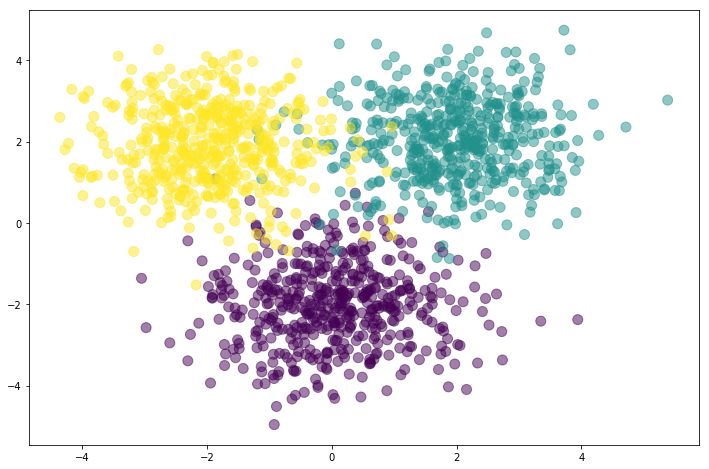

('cost: ', -1979.086677744729, 'classification_rate: ', 0.3333333333333333)
('cost: ', -849.9480836301309, 'classification_rate: ', 0.9033333333333333)
('cost: ', -450.1613433495627, 'classification_rate: ', 0.954)
('cost: ', -324.2649865935231, 'classification_rate: ', 0.962)
('cost: ', -270.7535334499206, 'classification_rate: ', 0.9613333333333334)
('cost: ', -242.3958975031586, 'classification_rate: ', 0.9613333333333334)
('cost: ', -225.23949366073447, 'classification_rate: ', 0.9613333333333334)
('cost: ', -213.92004499343352, 'classification_rate: ', 0.9606666666666667)
('cost: ', -205.97660128365823, 'classification_rate: ', 0.9606666666666667)
('cost: ', -200.13475175960775, 'classification_rate: ', 0.9606666666666667)


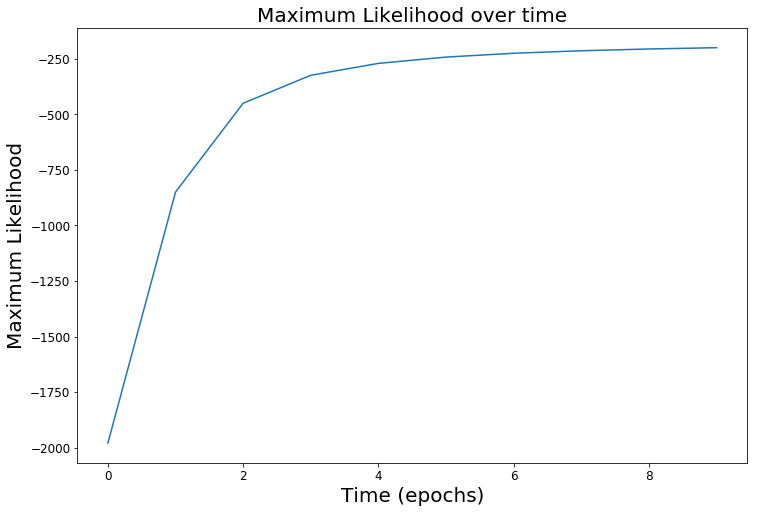

('Non vectorized training time in seconds: ', 41.28394079208374)


In [27]:
import time 
start = time.time()
backprop(True)
end = time.time()
print('Non vectorized training time in seconds: ', end - start)

## Train using non-vectorized implementation

In [29]:
import time 
start = time.time()
# backprop(False)
end = time.time()
print('Non vectorized training time in seconds: ', end - start)

('Non vectorized training time in seconds: ', 3.314018249511719e-05)


---
<br></br>
# Appendix: Code Vectorization


After seeing the above timing difference between how long it took the for loop implementation vs. the vectorized implementation, it should be clear why we would want to vectorize our derivative functions. However, if you are unclear on how we got to that point, this section is for you. 

### Vectorize derivative with respect to $W_2$
Let's start by looking at $W_2$. The whole purpose of the derivative of $J$ with respect to $W_2$ is to find the gradient so that we can update the all of the weights in $W_2$, and then reduce our cost during the next forward pass. Recall the shape of $W_2$:

<img src="images/w2-matrix.png">

It is an **(M x K)** matrix, where in the case of our problem M = 3 and K = 3. So, we need to keep in mind that the result of this process will need to be an **(M x K)** matrix of updates that will then be applied to our original $W_2$. Now with that said, our gradient for $J$ with respect to $W_2$, for $N$ samples is:

#### $$\frac{\partial J}{\partial W_{mk}^2} = \sum_{n=1}^N(t_{n,k}-y_{n,k})z_{n,m}$$

Now we could implement that via for loops which we did in the `derivative_w2-slow`. The whole process looks like:
1. Start with all indeces at 0
2. Subtract Y[0,0] from T[0,0]
3. Then perform a matrix multiplication of Z[0,0] times the result of step 2.
4. Both (T[0,0] - Y[0,0]) and Z[0,0] are scalar values, so the result is just a scalar
5. That resulting scalar value is now the value of $W_{0,0}^2$
6. We then increment our **k** index and perform the same process
7. This is done until we reach the end of our range for **k**, at which point we increment **m**.
8. We then repeat until all of the $W_2$ update values have been filled in
9. At this point we repeat the process the second sample, since we have now incremented **n**.
10. We update our update value for $W_2$ from the first iteration 
11. This is repeated for all samples of n

That is the process our for loop implementation follows. However, numpy has some tremendous speed optimizations that it makes use of, so by vectorizing our solution it will run significantly faster.

Let's break down the problem and see how we could go about vectorizing it. First, take not of what the gradient is dependent on: $Z$, $T$, and $Y$. Each can be visualized below.

<img src="images/z-matrix.png">

<img src="images/t-matrix.png">

<img src="images/y-matrix.png">

We can see that:
> * Z: **(N x M)**
* T: **(N x K)**
* Y: **(N x K)**

The first that jumps out as an easy vectorization is:

#### $$(t_{n,k}-y_{n,k})$$

That, combined with our for loops, is just saying that for all values of $n$ and $k$, subtract $y$ from $t$. Since $T$ and $Y$ are both of shape **(N x K)**, we can perform a simple matrix subtraction (element by element), and have an end result of the same shape **(N x K)**. In the image below, $Y` = T - Y$:

<img src="images/t-y-matrix.png">

Great, now we have gotten rid of 1 for loop. The next thing we can do is look at:

#### $$(t_{n,k}-y_{n,k})z_{n,m} = y`*z_{n,m}$$

Here, $y`$, which is just the result of $T - Y$, is an **(N x K)** matrix. $Z$ is an **N x M** matrix. The inner dimmensions clearly do not match right off the bat:
#### $$(N x K) != (N x M)$$

However, we can perform a matrix transpose on $Z$, where $Z^T$ is an **(M x K)** matrix, and switch the ordering so that we can perform a matrix multiplication. The new matrix multiplication is: 

#### $$(M x N) * (N x K) = (M x K)$$

This is exactly the update shape that we wanted in order to update $W_2$. If that all seemed a little confusing, lets get a quick visualization: 

We are treating the transpose of $Z$ as a set of operations, and running our $Y`$ through it. The dot product is performed on the first column of $Y`$ (a vector) and the first row of $Z^T$. The result is the value for $W^2_{0,0}$. We then run that $Y`$ vector through the rest of the $Z^T$ operations (rows), which fills in the rest of the first column of $W_2$. This process of have our $Y`$ column vector running through our $Z^T$ matrix (along the M dimension), is now taking the place of the for loop over $M$. So we can get rid of that for loop!

<img src="images/z-transpose-y.png">

<img src="images/w2-update-1.png">

We then perform the same process with the second column vector in $Y`$, which gives us the second column of our $W_2$ update. 

<img src="images/z-transpose-y-2.png">

<img src="images/w2-update-2.png">

Because our matrices for $Z$ and $T$ and $Y$ all contain our $N$ examples, we no longer need to loop over $N$!

The end result is our final update rule:

#### $$\frac{\partial J}{\partial W_{2}} = Z^T*(T - Y)$$

# Vectorize Derivative with respect to $W_1$
Let's move on to the derivative with respect to $W_1$. This one is slightly more complicated, which makes understanding it even more important. If we are able to understand the vectorization of this example, then adding more hidden layers and recursively defining them is a piece of cake. 

First, recall the formula we were using. Here it is for one sample:

#### $$\frac{\partial J}{\partial W_{1}} = \sum_{k=1}^K(t_k-y_k)V_{mk}z_m(1-z_m)x_d$$

And for $N$ samples:

#### $$\frac{\partial J}{\partial W_{1}} = \sum_{n=1}^N\sum_{k=1}^K(t_{n,k}-y_{n,k})W_2z_{n,m}(1-z_{n,m})x_{n,d}$$

Keep in mind that $W_{2} = V_{mk}$, the notation has been used interchangably up until this point. We can see rather clearly that this derivative is a function of: $Y, T, Z, X, and W_2$. The question I had when first looking at this was where do I even start? And more importantly, how do I navigate through all of the piles of linear algebra and get a mental model for what is really happening when this code is being vectorized? I found that I was able to "understand" the problem when just looking at a simple architecture, and likewise I was able to "understand" the linear algebra and matrix multiplication when writing it out on paper. But when trying to link the two together, I was getting stuck. It is very easy to lose sight of what certain variables are actually referring to as the problem goes on; so let's make sure we know exactly what each variable represents in the context of ouf diagram. We will start by recalling the network architecture that we are dealing with:

<img src="images/backprop-in-code-diagram.png">

And now lets make sure we have a clear understanding of where $Y, T, Z, X, and W_2$ fit in related to this diagram. First, we can look at $T$. It represents our *one hot encoded* target matrix, every value is either a **0** (this training example is not associated with the respective class) or a **1** (the training example is part of the respective class). Each row of this matrix represents a training example, of which there are **N** total (1500 in our example). Each column corresponds to a specific output node, of which there are **K = 3** in our example.  

<img src="images/tmatrix.png">

Now lets look at our $Y$ matrix. This, like $T$, is also an **N x K** matrix. Each row corresponds to a specific training example, and each column represents the prediction's for a certain output node. 

<img src="images/ymatrix.png">

Okay, this should all make sense so far. Now here is where things can get tricky. When originally going through the forward pass walk through, it makes sense that each node has a connection to each node in the subsequent layer, and that each connection gets its own weight value. Never forget, the whole idea being back propagation is to learn those values so that we increase our prediction accuracy. Now, since we have **M** nodes in our hidden layer, and **K** nodes in our output layer, a nice way to store these weights would be in an **(M x K)** matrix, $W_2$. So the first row would correspond to the weights mapping from the 1st node in the hidden layer, to all **M** nodes in the output layer. The second row would hold the weights mapping from the 2nd node in the hidden layer to all **M** nodes in the output layer. Because **M** and **K** are both 3 in this example, our weight matrix is **3 x 3**.

<img src="images/w2row1.png">

<img src="images/w2row2.png">

<img src="images/w2row3.png">

Great, we know where all of the values came from. But, what does each row represent? And each column? Well, it is really important to know that precisely and it is something that easily can be forgotten. Each row in the $W_2$ matrix corresponds to the mapping from a specific hidden layer node, to all output nodes. And each column corresponds to the mapping from 1 output node to all hidden layer nodes. 

<img src="images/w2rows.png">

<img src="images/w2columns.png">

As for $Z$, it is an **(N x M)** matrix, and holds the values at the hidden layer for all **M** nodes, for all **N** examples. Each row reprents the **M** nodes values for a particular training example, and each column holds the values at a particular node for all training examples.

<img src="images/zmatrix.png">

Lastly, $X$ is a **(N x D)** matrix and holds the values of the input layer for all training examples. There are **D** nodes in the input layer, representing **D** input features. Each row in the $X$ matrix is a specific input example, and each column is the value of a specific node for all the **N** examples. 

<img src="images/xmatrix.png">

Now that we have a solid understanding of what each matrix looks like and have visually seen its shape, we can begin with the vectorization process. Starting with the initial unvectorized equation:

#### $$\frac{\partial J}{\partial W_{1}} = \sum_{n=1}^N\sum_{k=1}^K(t_{n,k}-y_{n,k})W_2z_{n,m}(1-z_{n,m})x_{n,d}$$

Let's look at the following term first: 

#### $$(t_{n,k}-y_{n,k})$$

This term is subtract our $y$ prediction for the $n$th example at the $k$ node, from the the $t$ target at the $n$th example and $k$th node. If we look at that in terms of our matrix, that means that first we perform $T_{11} - Y_{11}$, then $T_{12} - Y_{12}$, and finally $T_{13} - Y_{13}$. That has effectively looped over subtracting the first row of $Y$ from the first row of $T$-and remember the first row just correspond to the first training example. If we perform an element wise subtraction of $T - Y$ we perform the looping that was done via the the summation. So, to vectorize this portion, we just turn it into:

#### $$T - Y$$

Our equation now looks like: 
#### $$\frac{\partial J}{\partial W_{1}} = \sum_{n=1}^N\sum_{k=1}^K(T - Y)W_2z_{n,m}(1-z_{n,m})x_{n,d}$$

On the the second term; we can now look at how to multiply $T-Y$ times $W_{mk}^2$. Okay, so we know that the matrix holding $T-Y$ is going to (N x K), and that $W_2$ is an (M x K) matrix. In order to multiply two matrices together that have different sizes (standard matrix multiplication) we need the inner matrice dimensions to match up. In this case, the best way to do that is the take the transpose of $W_2$, giving us $W_2^T$, and a matrix dimension of (K x M). But what does this mean in terms of our neural net? Well, take a look at the diagram of $W_2$ again. By taking a transpose, we are swapping the rows and columns. So the first row of $W_2$ ($W_{11}, W_{12}, W_{13}$) will be the first column in $W_2^T$, and so on the for the next two rows. Then, imagine taking $W_2$ at applying $T-Y$ to it. In order words, think about "pouring" $W_{11}, W_{12}, W_{13}$ through $T-Y$, giving us the first column of our out output matrix. This is then done for the next two rows in $W_2$. In terms of our network we can think of this as multiplying the weights mapping from node 1 in the hidden layer to all nodes in the output layer, times the difference between our target and prediction, for all training examples. We then repeat that process for the weights mapping from node 2 in the hidden layer to all nodes in the output layer, and then node 3 in the hidden layer, to all nodes in the output layer. Our output dimension will be (N x M). This means that our equation can now be rewritten as: 

#### $$\frac{\partial J}{\partial W_{1}} = \sum_{n=1}^N\sum_{k=1}^K(T - Y)W_2z_{n,m}(1-z_{n,m})x_{n,d}$$

And in code it would now look like:

`(T - Y).dot(W2.T)*Z[n,m]*(1-Z[n,m])*X[n,d]`

Next, let's vectorize the portion involving the hidden layer $Z$:

#### $$ z_{n,m}(1-z_{n,m})$$

The $(1-z_{n,m})$ can be rewritten as element wise subtraction, where the 1 just becomes an (M x N) matrix of ones in order to match Z. We can then perform element wise multiplication between $z_{n,m}$ and $(1-z_{n,m})$, because they are the same size and have the same indices , $n$ and $m$. The only other thing that we need to consider is how to combine the previous vectorization with this piece. Should we be performing element wise or matrix multiplication? Well, the dimensions of `(T - Y).dot(W2.T)` are (N x M), and the dimensions of $ z_{n,m}(1-z_{n,m})$ are also (N x M), meaning that we will be performing element wise multiplication. If that isn't clear, let's look at our original equation agian: 

`(T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1-Z[n,m])`

The $k$ is entirely gone based on our prior vectorization (we were able to remove that loop because nothing else depended on $k$). That means that on the whole our equation had the form:

`(T[n] - Y[n])*W2[m]*Z[n,m]*(1-Z[n,m])`

We can see now that as we loop over $m$ and $n$, our indices will always be matched up (since each portion is indexed by $m$ and $n$, meaning it should be an element wise multiplication. This leaves us with following equation:

`(T - Y).dot(W2.T)*Z*(1-Z)*X[n,d]`

Note that if you go through my brief numpy walk through you will see that the `dot` function refers to standard matrix multiplication, and the `*` refers to element wise multiplication. 

So at this point we only have one piece left to to vectorize, the $X_{nd}$. Everything prior to the X_{nd} in the equation has a resulting matrix shape of (N x M), while $X$ has a shape of (N x D). At this point it is incredibly important to remember what we are solving for! Our end goal is matrix of updates for $W_1$. Because $W_1$ has the shape (D x M), that means that our update matrix should also have the shape (D x M). Currently however, our matrix mutliplication would be: (N x M) * (N x D). In order to end up at (D x M) we need to swap the ordering, and first take the transpose of $X$, like so:

`X.T.dot((T - Y).dot(W2.T) * Z * (1 - Z))`

In words this can be thought of as taking our X matrix, swapping its rows and columns (so now it is a (D x N) matrix) and then applying our previously vectorized code to it (N x M), in the form of "pouring" it through the transposed $X$ and performing the dot product as it passes each row. At this point we have been able to get rid of the for loop for $N$, $D$, and $M$. 